In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

2023-11-14 16:49:36.960993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data preparation

In [2]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
def make_model(input_shape, conv_filters, conv_kernel_size, pool_size, learning_rate=0.002, momentum=0.8):
    inputs = keras.Input(shape=input_shape)

    cnn_layer = keras.layers.Conv2D(
        conv_filters,
        conv_kernel_size,
        activation='relu',
    )(inputs)
    
    pooling_layer = keras.layers.MaxPooling2D(pool_size=pool_size)(cnn_layer)
    vectors = keras.layers.Flatten()(pooling_layer)
    inner = keras.layers.Dense(64, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    loss = keras.losses.BinaryCrossentropy()
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [54]:
# total images in train/test is 4595
# validation_split is 0.25
train_data_dir = './data/train'
test_data_dir = './data/test'
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.25)

train_ds = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    subset='training',
    class_mode='binary',
)

val_ds = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

Found 2758 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [4]:
train_ds.class_indices, val_ds.class_indices

({'bee': 0, 'wasp': 1}, {'bee': 0, 'wasp': 1})

In [28]:
model = make_model((150, 150, 3), 32, (3, 3), (2, 2), learning_rate=0.002, momentum=0.8)

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
87/87 [==============================] - 23s 255ms/step - loss: 0.6520 - accuracy: 0.6015 - val_loss: 0.6479 - val_accuracy: 0.6181
Epoch 2/10
87/87 [==============================] - 21s 243ms/step - loss: 0.5625 - accuracy: 0.7099 - val_loss: 0.5346 - val_accuracy: 0.7454
Epoch 3/10
87/87 [==============================] - 21s 246ms/step - loss: 0.5046 - accuracy: 0.7520 - val_loss: 0.5465 - val_accuracy: 0.7323
Epoch 4/10
87/87 [==============================] - 21s 243ms/step - loss: 0.4710 - accuracy: 0.7752 - val_loss: 0.5141 - val_accuracy: 0.7410
Epoch 5/10
87/87 [==============================] - 21s 245ms/step - loss: 0.4262 - accuracy: 0.8107 - val_loss: 0.5164 - val_accuracy: 0.7476
Epoch 6/10
87/87 [==============================] - 22s 249ms/step - loss: 0.4088 - accuracy: 0.8194 - val_loss: 0.5238 - val_accuracy: 0.7465
Epoch 7/10
87/87 [==============================] - 21s 246ms/step - loss: 0.3610 - accuracy: 0.8513 - val_loss: 0.5651 - val_accuracy: 0.7160

# Question 1

In [14]:
# use binary cross entropy loss function for binary classification

# Question 2

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

# Question 3

In [47]:
train_data_gen2 = ImageDataGenerator(rescale=1./255)
train_gen2 = train_data_gen2.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

test_data_gen2 = ImageDataGenerator(rescale=1./255)
test_gen2 = test_data_gen2.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

model2 = make_model((150, 150, 3), 32, (3, 3), (2, 2), learning_rate=0.002, momentum=0.8)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [48]:
hist2 = model2.fit(
    train_gen2,
    epochs=10,
    validation_data=test_gen2
)

Epoch 1/10
184/184 [==============================] - 32s 170ms/step - loss: 0.6851 - accuracy: 0.5396 - val_loss: 0.6568 - val_accuracy: 0.5861
Epoch 2/10
184/184 [==============================] - 35s 190ms/step - loss: 0.6711 - accuracy: 0.5717 - val_loss: 0.6418 - val_accuracy: 0.6100
Epoch 3/10
184/184 [==============================] - 38s 206ms/step - loss: 0.6514 - accuracy: 0.6089 - val_loss: 0.6098 - val_accuracy: 0.6710
Epoch 4/10
184/184 [==============================] - 45s 245ms/step - loss: 0.6177 - accuracy: 0.6538 - val_loss: 0.6050 - val_accuracy: 0.6198
Epoch 5/10
184/184 [==============================] - 34s 185ms/step - loss: 0.5854 - accuracy: 0.6851 - val_loss: 0.5548 - val_accuracy: 0.7146
Epoch 6/10
184/184 [==============================] - 34s 184ms/step - loss: 0.5470 - accuracy: 0.7226 - val_loss: 0.5311 - val_accuracy: 0.7298
Epoch 7/10
184/184 [==============================] - 31s 168ms/step - loss: 0.5224 - accuracy: 0.7487 - val_loss: 0.5563 - val_ac

In [49]:
hist2.history

{'loss': [0.6850511431694031,
  0.6711421608924866,
  0.6513741612434387,
  0.6177226305007935,
  0.5853981971740723,
  0.547035276889801,
  0.5224263072013855,
  0.5054835081100464,
  0.48846909403800964,
  0.46709221601486206],
 'accuracy': [0.5395703315734863,
  0.571661651134491,
  0.6089203357696533,
  0.6537938714027405,
  0.6850693225860596,
  0.7225999236106873,
  0.748708188533783,
  0.766929566860199,
  0.7794397473335266,
  0.7927658557891846],
 'val_loss': [0.6568340063095093,
  0.6418099403381348,
  0.6098469495773315,
  0.604968249797821,
  0.5547739267349243,
  0.5310815572738647,
  0.5563026666641235,
  0.5233651995658875,
  0.550957441329956,
  0.5098397731781006],
 'val_accuracy': [0.586056649684906,
  0.6100217700004578,
  0.671023964881897,
  0.6198257207870483,
  0.7145969271659851,
  0.7298474907875061,
  0.7102396488189697,
  0.7538126111030579,
  0.7167755961418152,
  0.7679738402366638]}

In [50]:
np.median(hist2.history['accuracy'])

0.7038346230983734

# Question 4

In [51]:
np.mean(hist2.history['loss']), np.std(hist2.history['loss'])

(0.5741194695234298, 0.07524853694974389)

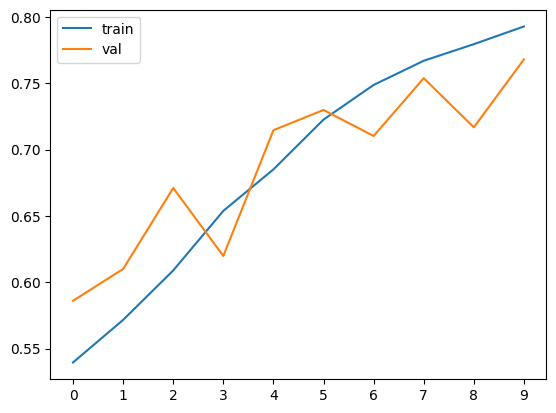

In [52]:
plt.plot(hist2.history['accuracy'], label='train')
plt.plot(hist2.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [55]:
train_data_gen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
train_gen3 = train_data_gen3.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

test_data_gen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
test_gen3 = test_data_gen3.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

hist3 = model2.fit(
    train_gen3,
    epochs=10,
    validation_data=test_gen3
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.
Epoch 1/10
184/184 [==============================] - 51s 279ms/step - loss: 0.5203 - accuracy: 0.7601 - val_loss: 0.4988 - val_accuracy: 0.7625
Epoch 2/10
184/184 [==============================] - 51s 278ms/step - loss: 0.5114 - accuracy: 0.7522 - val_loss: 0.5067 - val_accuracy: 0.7745
Epoch 3/10
184/184 [==============================] - 55s 301ms/step - loss: 0.4962 - accuracy: 0.7667 - val_loss: 0.5058 - val_accuracy: 0.7712
Epoch 4/10
184/184 [==============================] - 56s 306ms/step - loss: 0.4894 - accuracy: 0.7713 - val_loss: 0.4749 - val_accuracy: 0.7876
Epoch 5/10
184/184 [==============================] - 56s 305ms/step - loss: 0.4900 - accuracy: 0.7645 - val_loss: 0.4782 - val_accuracy: 0.7810
Epoch 6/10
184/184 [==============================] - 53s 289ms/step - loss: 0.4798 - accuracy: 0.7754 - val_loss: 0.4901 - val_accuracy: 0.7658
Epoch 7/10
184/184 [===========================

In [56]:
hist3.history

{'loss': [0.520334005355835,
  0.5114219784736633,
  0.49618402123451233,
  0.489430695772171,
  0.4900418221950531,
  0.4797976016998291,
  0.48056745529174805,
  0.47318243980407715,
  0.4689139723777771,
  0.4641149044036865],
 'accuracy': [0.7601305246353149,
  0.75224369764328,
  0.7666575908660889,
  0.7712809443473816,
  0.7644819021224976,
  0.7753603458404541,
  0.7810715436935425,
  0.778351902961731,
  0.7799836993217468,
  0.7848789691925049],
 'val_loss': [0.49880704283714294,
  0.5066530108451843,
  0.5057936906814575,
  0.474867582321167,
  0.47817713022232056,
  0.49012812972068787,
  0.4638565480709076,
  0.4898778796195984,
  0.4927843511104584,
  0.5599122047424316],
 'val_accuracy': [0.7625272274017334,
  0.7745097875595093,
  0.7712418437004089,
  0.7875816822052002,
  0.7810457348823547,
  0.7657952308654785,
  0.7864923477172852,
  0.7647058963775635,
  0.7592592835426331,
  0.7037037014961243]}

# Question 5

In [58]:
np.mean(hist3.history['val_loss'])

0.49608575701713564

# Question 6

In [59]:
np.mean(hist3.history['val_accuracy'][5:])

0.7559912919998169